## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mice_total = combined_mice_df["Mouse ID"].nunique()
mice_total

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
for mouse in combined_mice_df:
    
    duplicate_rows_df = combined_mice_df[combined_mice_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

print(duplicate_rows_df)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Drop any duplicate rows
clean_mice_df = combined_mice_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
clean_mice_total = clean_mice_df["Mouse ID"].nunique()
clean_mice_total

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

grouped_regimen = clean_mice_df.groupby("Drug Regimen")

grouped_regimen.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}).rename(columns={
    'mean' : 'Mean', 'median' : 'Median', 'var' : 'Variance', 'std' : 'Standard Deviation', 'sem' : "SEM"})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

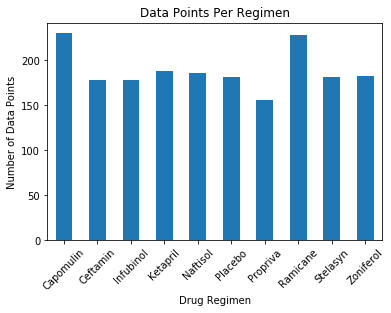

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

timepoint_count = grouped_regimen["Timepoint"].count()
timepoint_count

mice_regimen = timepoint_count.plot(kind='bar')
mice_regimen.set_xlabel("Drug Regimen")
mice_regimen.set_ylabel("Number of Data Points")
mice_regimen.set_title("Data Points Per Regimen")
plt.xticks(rotation=45)

plt.show()
plt.tight_layout()

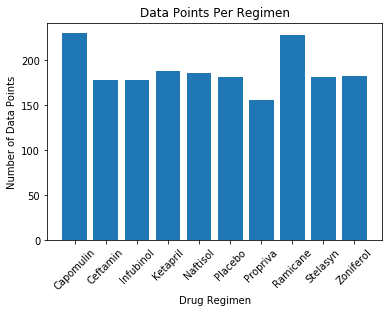

<Figure size 432x288 with 0 Axes>

In [8]:
# General identical bar plot using pyplot instead of pandas.
x_axis = np.arange(len(timepoint_count))

plt.bar(x_axis, timepoint_count)
plt.xticks(x_axis, timepoint_count.index, rotation=45)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Regimen")

plt.show()
plt.tight_layout()

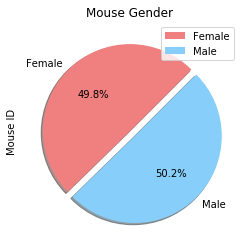

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_mice_df.groupby(["Sex"])["Mouse ID"].nunique()
mice_gender
explode = (0, 0.08)
colors = ["lightcoral", "lightskyblue"]

mice_gender.plot(kind="pie", explode=explode, shadow=True, startangle=45, 
                 colors=colors, autopct="%1.1f%%", title="Mouse Gender")
plt.legend()
plt.show()


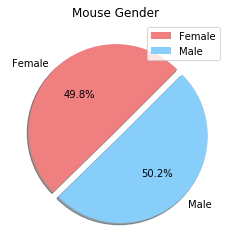

In [11]:
# Generate identical pie plot using pyplot

labels = ["Female", "Male"]

plt.pie(mice_gender, explode=explode, shadow=True, startangle=45, 
                 colors=colors, autopct="%1.1f%%", labels=labels)

plt.title("Mouse Gender")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
                                         
mouse_id = clean_mice_df.groupby(["Mouse ID", "Drug Regimen"])

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_id["Timepoint"].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_timepoint_df = pd.merge(combined_mice_df, max_timepoint, on=["Mouse ID", "Timepoint"])
combined_timepoint_df

# Create list of tumor volume at last timepoint by Drug Regimen
ramicane_data = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
#print(ramicane_data)
capomulin_data = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
#print(capomulin_data)
infubinol_data = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
#print(infubinol_data)
ceftamin_data = combined_timepoint_df.loc[combined_timepoint_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
#print(ceftamin_data)





Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


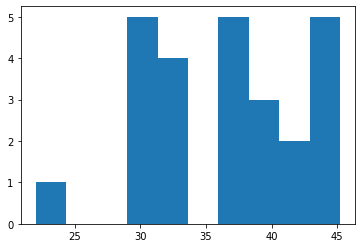

In [41]:
# Calculate quartiles, interquartile range IQR, and identify potential outliers for each regimen.
# One method to do this is the following, but you can use whatever method works for you.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the interquartile range IQR and quantitatively determine if there are any potential outliers. 

#Ramicane Data
plt.hist(ramicane_data)

r_quartile = ramicane_data.quantile([.25,.5,.75])
r_lowerq = r_quartile[.25]
r_upperq = r_quartile[.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
r_outliers = ramicane_data.loc[(ramicane_data < r_lower_bound) | (ramicane_data > r_upper_bound)]

print(f"The lower quartile of occupancy is: {r_lowerq}")
print(f"The upper quartile of occupancy is: {r_upperq}")
print(f"The interquartile range of occupancy is: {r_iqr}")
print(f"Ramicane's potential outliers: {r_outliers}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


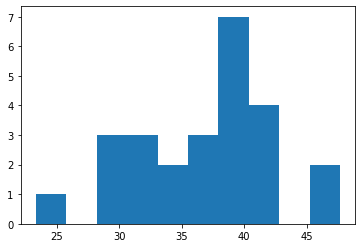

In [42]:
#Capomulin Data
plt.hist(capomulin_data)

c_quartile = capomulin_data.quantile([.25,.5,.75])
c_lowerq = c_quartile[.25]
c_upperq = c_quartile[.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
c_outliers = capomulin_data.loc[(capomulin_data < c_lower_bound) | (capomulin_data > c_upper_bound)]

print(f"The lower quartile of occupancy is: {c_lowerq}")
print(f"The upper quartile of occupancy is: {c_upperq}")
print(f"The interquartile range of occupancy is: {c_iqr}")
print(f"Capomulin's potential outliers: {c_outliers}")

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64


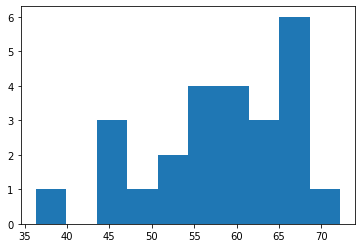

In [43]:
#Infubinol Data
plt.hist(infubinol_data)

i_quartile = infubinol_data.quantile([.25,.5,.75])
i_lowerq = i_quartile[.25]
i_upperq = i_quartile[.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
i_outliers = infubinol_data.loc[(infubinol_data < i_lower_bound) | (infubinol_data > i_upper_bound)]

print(f"The lower quartile of occupancy is: {i_lowerq}")
print(f"The upper quartile of occupancy is: {i_upperq}")
print(f"The interquartile range of occupancy is: {i_iqr}")
print(f"Infubinol's potential outliers: {i_outliers}")

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


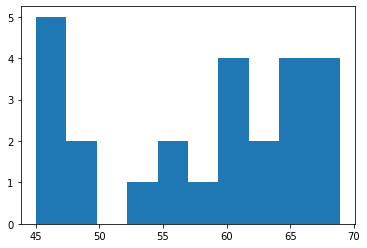

In [44]:
#Ceftamin Data
plt.hist(ceftamin_data)

cf_quartile = ceftamin_data.quantile([.25,.5,.75])
cf_lowerq = cf_quartile[.25]
cf_upperq = cf_quartile[.75]
cf_iqr = cf_upperq-cf_lowerq
cf_lower_bound = cf_lowerq - (1.5*cf_iqr)
cf_upper_bound = cf_upperq + (1.5*cf_iqr)
cf_outliers = ceftamin_data.loc[(ceftamin_data < cf_lower_bound) | (ceftamin_data > cf_upper_bound)]

print(f"The lower quartile of occupancy is: {cf_lowerq}")
print(f"The upper quartile of occupancy is: {cf_upperq}")
print(f"The interquartile range of occupancy is: {cf_iqr}")
print(f"Ceftamin's potential outliers: {cf_outliers}")

In [45]:
# Determine outliers using upper and lower bounds
print(f"Ramicane's potential outliers: {r_outliers}")
print(f"Capomulin's potential outliers: {c_outliers}")
print(f"Infubinol's potential outliers: {i_outliers}")
print(f"Ceftamin's potential outliers: {cf_outliers}")

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


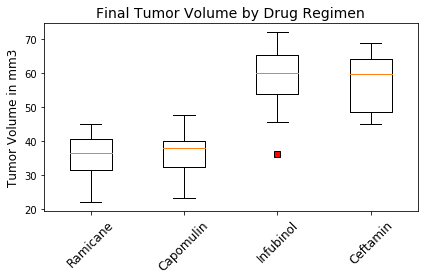

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
drug_data = [ramicane_data, capomulin_data, infubinol_data, ceftamin_data]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen", fontsize=14)
ax1.set_ylabel("Tumor Volume in mm3", fontsize=12)
ax1.set_xticklabels(["Ramicane", "Capomulin", "Infubinol", "Ceftamin"], rotation=45, fontsize=12)
ax1.boxplot(drug_data, flierprops=red_square)
plt.tight_layout()




## Line and Scatter Plots

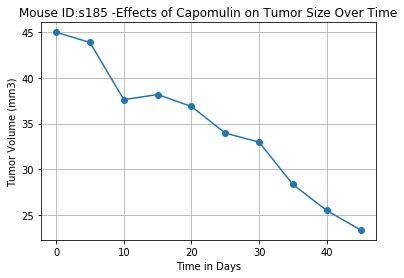

In [130]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
capomulin_data = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
#capomulin_data
mouse_data = clean_mice_df.loc[clean_mice_df["Mouse ID"] == "s185"]
#mouse_data

plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID:s185 -Effects of Capomulin on Tumor Size Over Time")
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")

plt.grid()
plt.show()

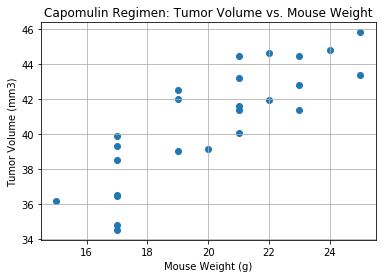

<Figure size 432x288 with 0 Axes>

In [149]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
mouse_average = capomulin_data.groupby(["Mouse ID"]).mean()
#mouse_average

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regimen: Tumor Volume vs. Mouse Weight")
plt.scatter(mouse_average["Weight (g)"], (mouse_average["Tumor Volume (mm3)"]))

plt.grid()
plt.show()
plt.tight_layout()

## Correlation and Regression

In [155]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(mouse_average['Weight (g)'], mouse_average['Tumor Volume (mm3)'])[0],2)
print(correlation)


0.84


# Observations and Insights